# load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Kaggle')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
!pwd

/content/gdrive/MyDrive/Kaggle


**Download Dataset**

In [ ]:
#!kaggle datasets download -d hamedetezadi/persian-numbers

In [ ]:
#!unzip /content/gdrive/MyDrive/Kaggle/persian-numbers.zip

#Import my madule to read dataset

In [ ]:
import sys
sys.path.insert(0,'/content/gdrive/My Drive/Kaggle')

import HodaDatasetReader

# Import madules

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
from tensorflow.keras.utils import to_categorical
%matplotlib inline

# Split train and test dataset


**%75 train - %25 test**

In [ ]:
X_train, Y_train = read_hoda_cdb('/content/gdrive/MyDrive/Kaggle/Train 60000.cdb')
X_test, Y_test = read_hoda_cdb('/content/gdrive/MyDrive/Kaggle/Test 20000.cdb')                                   

In [ ]:
print('X_train check:')
type(X_train[0]), X_train[0].dtype, X_train[0].shape

X_train check:


(numpy.ndarray, dtype('uint8'), (27, 20))

In [ ]:
print('Y_train check:')
print(type(Y_train[0]))
print('Y_train[0]:',Y_train[0])

Y_train check:
<class 'int'>
Y_train[0]: 6


# Now  plot temp image

In [ ]:
Y_train[-1]

6

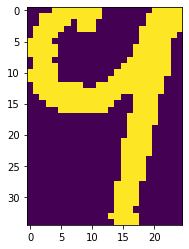

In [ ]:
plt.imshow(X_train[-1])

# Reshape data to shape(100,100) and Normalize data between(0,1) and float32 dtype

In [ ]:
X_train[0].shape, type(X_train), len(X_train)

((27, 20), list, 60000)

In [ ]:
New_train = []
New_test = []
for image in X_train: 
  Z = cv2.resize(image, dsize=(100,100))
  Z = Z.astype('float32')/255.0
  Z.reshape(100,100,1)
  New_train.append(Z)
for image in X_test: 
  Z = cv2.resize(image, dsize=(100,100))
  Z = Z.astype('float32')/255.0
  Z.reshape(100,100,1)
  New_test.append(Z)

In [ ]:
type(New_train[-1]),type(New_test[-1]),New_train[-1].shape,New_test[-1].shape

(numpy.ndarray, numpy.ndarray, (100, 100), (100, 100))

In [ ]:
New_train[-1].dtype,New_train[-1].min(),New_train[-1].max()

(dtype('float32'), 0.0, 1.0)

In [ ]:
X_train = New_train.copy()
X_test = New_test.copy()
New_train.clear()
New_test.clear()

In [ ]:
X_train[-1].dtype,X_train[-1].min(),X_train[-1].max()

(dtype('float32'), 0.0, 1.0)

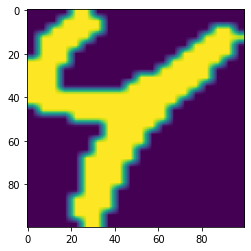

In [ ]:
plt.imshow(X_train[0])

# Convert labels to one-hot encoding


In [ ]:
print('Y_train[0] = ',Y_train[0])

Y_train[0] =  6


In [ ]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
Y_train.shape, Y_train.dtype,Y_test.shape, Y_test.dtype

((60000, 10), dtype('float32'), (20000, 10), dtype('float32'))

**now see new one-hot labels**

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## last final check of all shapes

In [ ]:
X_train = (np.array(X_train))
X_test = (np.array(X_test))
X_train.shape,X_test.shape

((60000, 100, 100), (20000, 100, 100))

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 100, 100), (60000, 10), (20000, 100, 100), (20000, 10))

# Import pre-trained model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Softmax, ReLU
from tensorflow.keras.optimizers import Adam

#Preprocess_input

**we use a portion of data**

In [ ]:
X_train = X_train[:15000]
Y_train = Y_train[:15000]

In [ ]:
from sklearn.utils import shuffle
X_test, Y_test = shuffle(X_test, Y_test, random_state=0)

In [ ]:
X_test = X_test[:5000]
Y_test = Y_test[:5000]

In [ ]:
New_train = []
for grey_img in X_train:
  rgb_img = cv2.cvtColor(grey_img,cv2.COLOR_GRAY2RGB)
  New_train.append(rgb_img) 

In [ ]:
New_test = []
for grey_img in X_test:
  rgb_img = cv2.cvtColor(grey_img,cv2.COLOR_GRAY2RGB)
  New_test.append(rgb_img) 

In [ ]:
X_train = np.array(New_train)
X_test = np.array(New_test)
New_train.clear()
New_test.clear()

In [ ]:
X_train.shape,X_test.shape

((15000, 100, 100, 3), (5000, 100, 100, 3))

#Create a VGG16 model 

In [ ]:
base_model = VGG16(weights='imagenet',include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
for layer in base_model.layers[:-2]:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**Create my own model**

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(units =512, activation='relu')(x)
x = Dense(units =128, activation='relu')(x)
predictions = Dense(units =10, activation='softmax')(x)

fine_tune_model = Model(base_model.input,predictions)

In [ ]:
fine_tune_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

# Compile the model and Fit model to data


In [ ]:
np.random.seed(1)

In [ ]:
fine_tune_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
fine_tune_model.fit(x=X_train, y=Y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.15, verbose=1) 

Epoch 1/10
399/399 [==============================] - 16s 39ms/step - loss: 0.3479 - accuracy: 0.8837 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 2/10
399/399 [==============================] - 15s 38ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0523 - val_accuracy: 0.9876
Epoch 3/10
399/399 [==============================] - 15s 39ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.0665 - val_accuracy: 0.9849
Epoch 4/10
399/399 [==============================] - 16s 39ms/step - loss: 0.0202 - accuracy: 0.9927 - val_loss: 0.0437 - val_accuracy: 0.9902
Epoch 5/10
399/399 [==============================] - 16s 39ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0587 - val_accuracy: 0.9876
Epoch 6/10
399/399 [==============================] - 16s 40ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0496 - val_accuracy: 0.9898
Epoch 7/10
399/399 [==============================] - 16s 41ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0565 - val_accuracy:

### plot model loss history

In [ ]:
model_loss_history = pd.DataFrame({'loss': fine_tune_model.history.history['loss'],
                                   'val_loss': fine_tune_model.history.history['val_loss']})

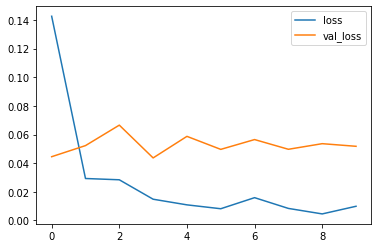

In [ ]:
model_loss_history.plot()

**min of validation loss**

In [ ]:
min_val_loss=model_loss_history['val_loss'].min()
min_train_loss=model_loss_history['loss'].min()

print('min_val_loss:',min_val_loss)
print('min_train_loss:',min_train_loss)

min_val_loss: 0.04365584999322891
min_train_loss: 0.0045625693164765835


### plot model accuracy history

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': fine_tune_model.history.history['accuracy'],
                                       'val_accuracy': fine_tune_model.history.history['val_accuracy']} )

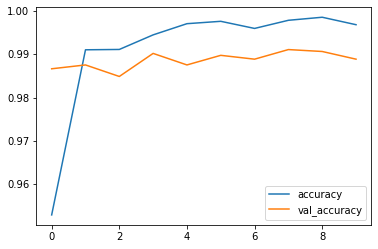

In [ ]:
model_accuracy_history.plot()

**max of validation accuracy**

In [ ]:
max_val_acc = model_accuracy_history['val_accuracy'].max()
print('max_val_acc:',max_val_acc)

max_val_acc: 0.9911110997200012


# Evaluate the model

In [ ]:
fine_tune_model.evaluate(x=X_test, y=Y_test)

157/157 [==============================] - 5s 32ms/step - loss: 0.0454 - accuracy: 0.9892


[0.045415908098220825, 0.9891999959945679]

In [ ]:
predict=fine_tune_model.predict(x=X_test)
predict = np.argmax(predict,axis=-1)
predict = to_categorical(predict, num_classes=10)

In [ ]:
from sklearn.metrics import classification_report 
report = classification_report(y_true=Y_test, y_pred=predict, digits=4)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0     0.9958    0.9835    0.9896       486
           1     0.9980    0.9980    0.9980       489
           2     0.9878    0.9818    0.9848       494
           3     0.9680    0.9847    0.9763       523
           4     0.9874    0.9732    0.9803       485
           5     0.9834    0.9979    0.9906       475
           6     0.9883    0.9903    0.9893       513
           7     0.9961    0.9922    0.9941       510
           8     0.9962    1.0000    0.9981       531
           9     0.9919    0.9899    0.9909       494

   micro avg     0.9892    0.9892    0.9892      5000
   macro avg     0.9893    0.9891    0.9892      5000
weighted avg     0.9893    0.9892    0.9892      5000
 samples avg     0.9892    0.9892    0.9892      5000

